In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# feature extraction imports
from sklearn.feature_extraction.text import TfidfVectorizer

#machine learning method imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tools import utils, ml_tools, formats

import matplotlib
import scienceplots
plt.style.use(['science', 'ieee','no-latex'])
matplotlib.rc('font', family='times new roman')

dir_csv = 'outputs/labels_cleaned_y1c1c2.csv'
df = pd.read_csv(dir_csv, encoding='utf-8')

In [8]:

labels = ['ArgumentLevel','ReasoningLevel'] # 'ArgumentLevel', 'ReasoningLevel'
labels2 = ['ArgumentLevel','ReasoningLevel','ArgumentLevel','ReasoningLevel'] # 'ArgumentLevel', 'ReasoningLevel'
features = ['ifidf','bow'] #'bow', 'ifidf'
num_epochs = 2500
train_sizes = [0.5,0.6,0.7,0.8,0.9] # proportion of training data
'''
What is the accuracies?
the accuracy arra contains 4 lists corresponding to each feature extraction technique used
each list contains 5 accuracy values corresponding to the training size used
each single value is the average accuracy score for 10 or more iterations (epoch is defined by the user)
'''

'\nWhat is the accuracies?\nthe accuracy arra contains 4 lists corresponding to each feature extraction technique used\neach list contains 5 accuracy values corresponding to the training size used\neach single value is the average accuracy score for 10 or more iterations (epoch is defined by the user)\n'

                                    NAIVE BAYES CLASSIFIER

In [4]:
#------ trainsize NB-----------
# loop over labels for training size, feature extractions: Naive bayes
accuracies = []
accuracies_sd = []
feature2 = []
labels2  = []
epochs_accuracies_per_trainsize = []
for label in labels:
    for feature in features:
        # -- Feature extraction: TF-IDF ---
        if feature ==  'ifidf':
            wordvec_names, wordvec_counts = ml_tools.tf_idf(df['Content'].tolist())
            print('tfidf')
            t = ml_tools.lr_accuracy_trainsize_plot_general(ml_tools.naive_bayes, wordvec_counts, df[label].tolist(),label, feature, num_epochs, train_sizes)
            accuracies.append(t[0])
            accuracies_sd.append(t[1])
            feature2.append(feature)
            labels2.append(label)
            epochs_accuracies_per_trainsize.append(t[2])
        # -- Feature extraction: Bag of Words ---
        elif feature == 'bow':
            wordvec_names, wordvec_counts = ml_tools.BoW(df['Content'].tolist())
            print('bow')
            b = ml_tools.lr_accuracy_trainsize_plot_general(ml_tools.naive_bayes, wordvec_counts, df[label].tolist(),label, feature, num_epochs, train_sizes)
            accuracies.append(b[0])
            accuracies_sd.append(b[1])
            feature2.append(feature)
            labels2.append(label)
            epochs_accuracies_per_trainsize.append(t[2])

df1 = pd.DataFrame({'feature extraction':feature2,'accuracy':accuracies, 'sem': accuracies_sd, 'Label': labels2})
df_nb_acc = pd.DataFrame(data = epochs_accuracies_per_trainsize, index = ['AL-ifidf', 'AL-bow', 'RL-ifidf', 'RL-bow'], columns=['0.5','0.6','0.7','0.8','0.9'] )

#%%
#----- pickled dataframe --------
utils.save_as_pickle_file(df1,'NB_trainingsize_plot_2500epochs_y1c1c2_sem')
#utils.save_as_pickle_file(df_nb_acc,'NB_trainingsize_arraystopandas_freqhist_2500epochs')
#%%
#----- unpicked data frame ------
unpickle_df = utils.load_pickle_file_to_df('NB_trainingsize_plot_2500epochs_y1c1c2_sem')
#%%
print(unpickle_df['accuracy'][0])
#%%
#----- individual graphs ------
for i in range(len(unpickle_df)):
    filepath = 'outputs/{}-NB2-{}epochs-{}-graph.png'.format(unpickle_df['feature extraction'][i], num_epochs, unpickle_df['Label'][i]) # ** always change name **
    formats.scatter_plot(xvalue = train_sizes, yvalue = unpickle_df['accuracy'][i], yerr = unpickle_df['sem'][i], xlabel = 'Training Size', ylabel = 'Accuracy', filepath = filepath)

#%%
# ---- histograph frequency plots -------
tsizes_str = ['0.5','0.6','0.7','0.8','0.9']
ft_ext     = ['AL-ifidf', 'AL-bow', 'RL-ifidf', 'RL-bow']
for size in tsizes_str:
    for cell in range(len(unpickle_df[size])) :
        filepath = 'outputs/{}-NB2-{}epochs-freq histograms-{}.png'.format(num_epochs,size,ft_ext[cell]) # ** always change name **
        formats.histogram(unpickle_df[size][cell], 'Accuracy', 'Frequency', filepath, size)


tfidf


KeyboardInterrupt: 

                                    RANDOM FOREST CLASSFIER
                                    

MemoryError: In RendererAgg: Out of memory

Error in callback <function _draw_all_if_interactive at 0x0000019D0ECFE550> (for post_execute):


MemoryError: In RendererAgg: Out of memory

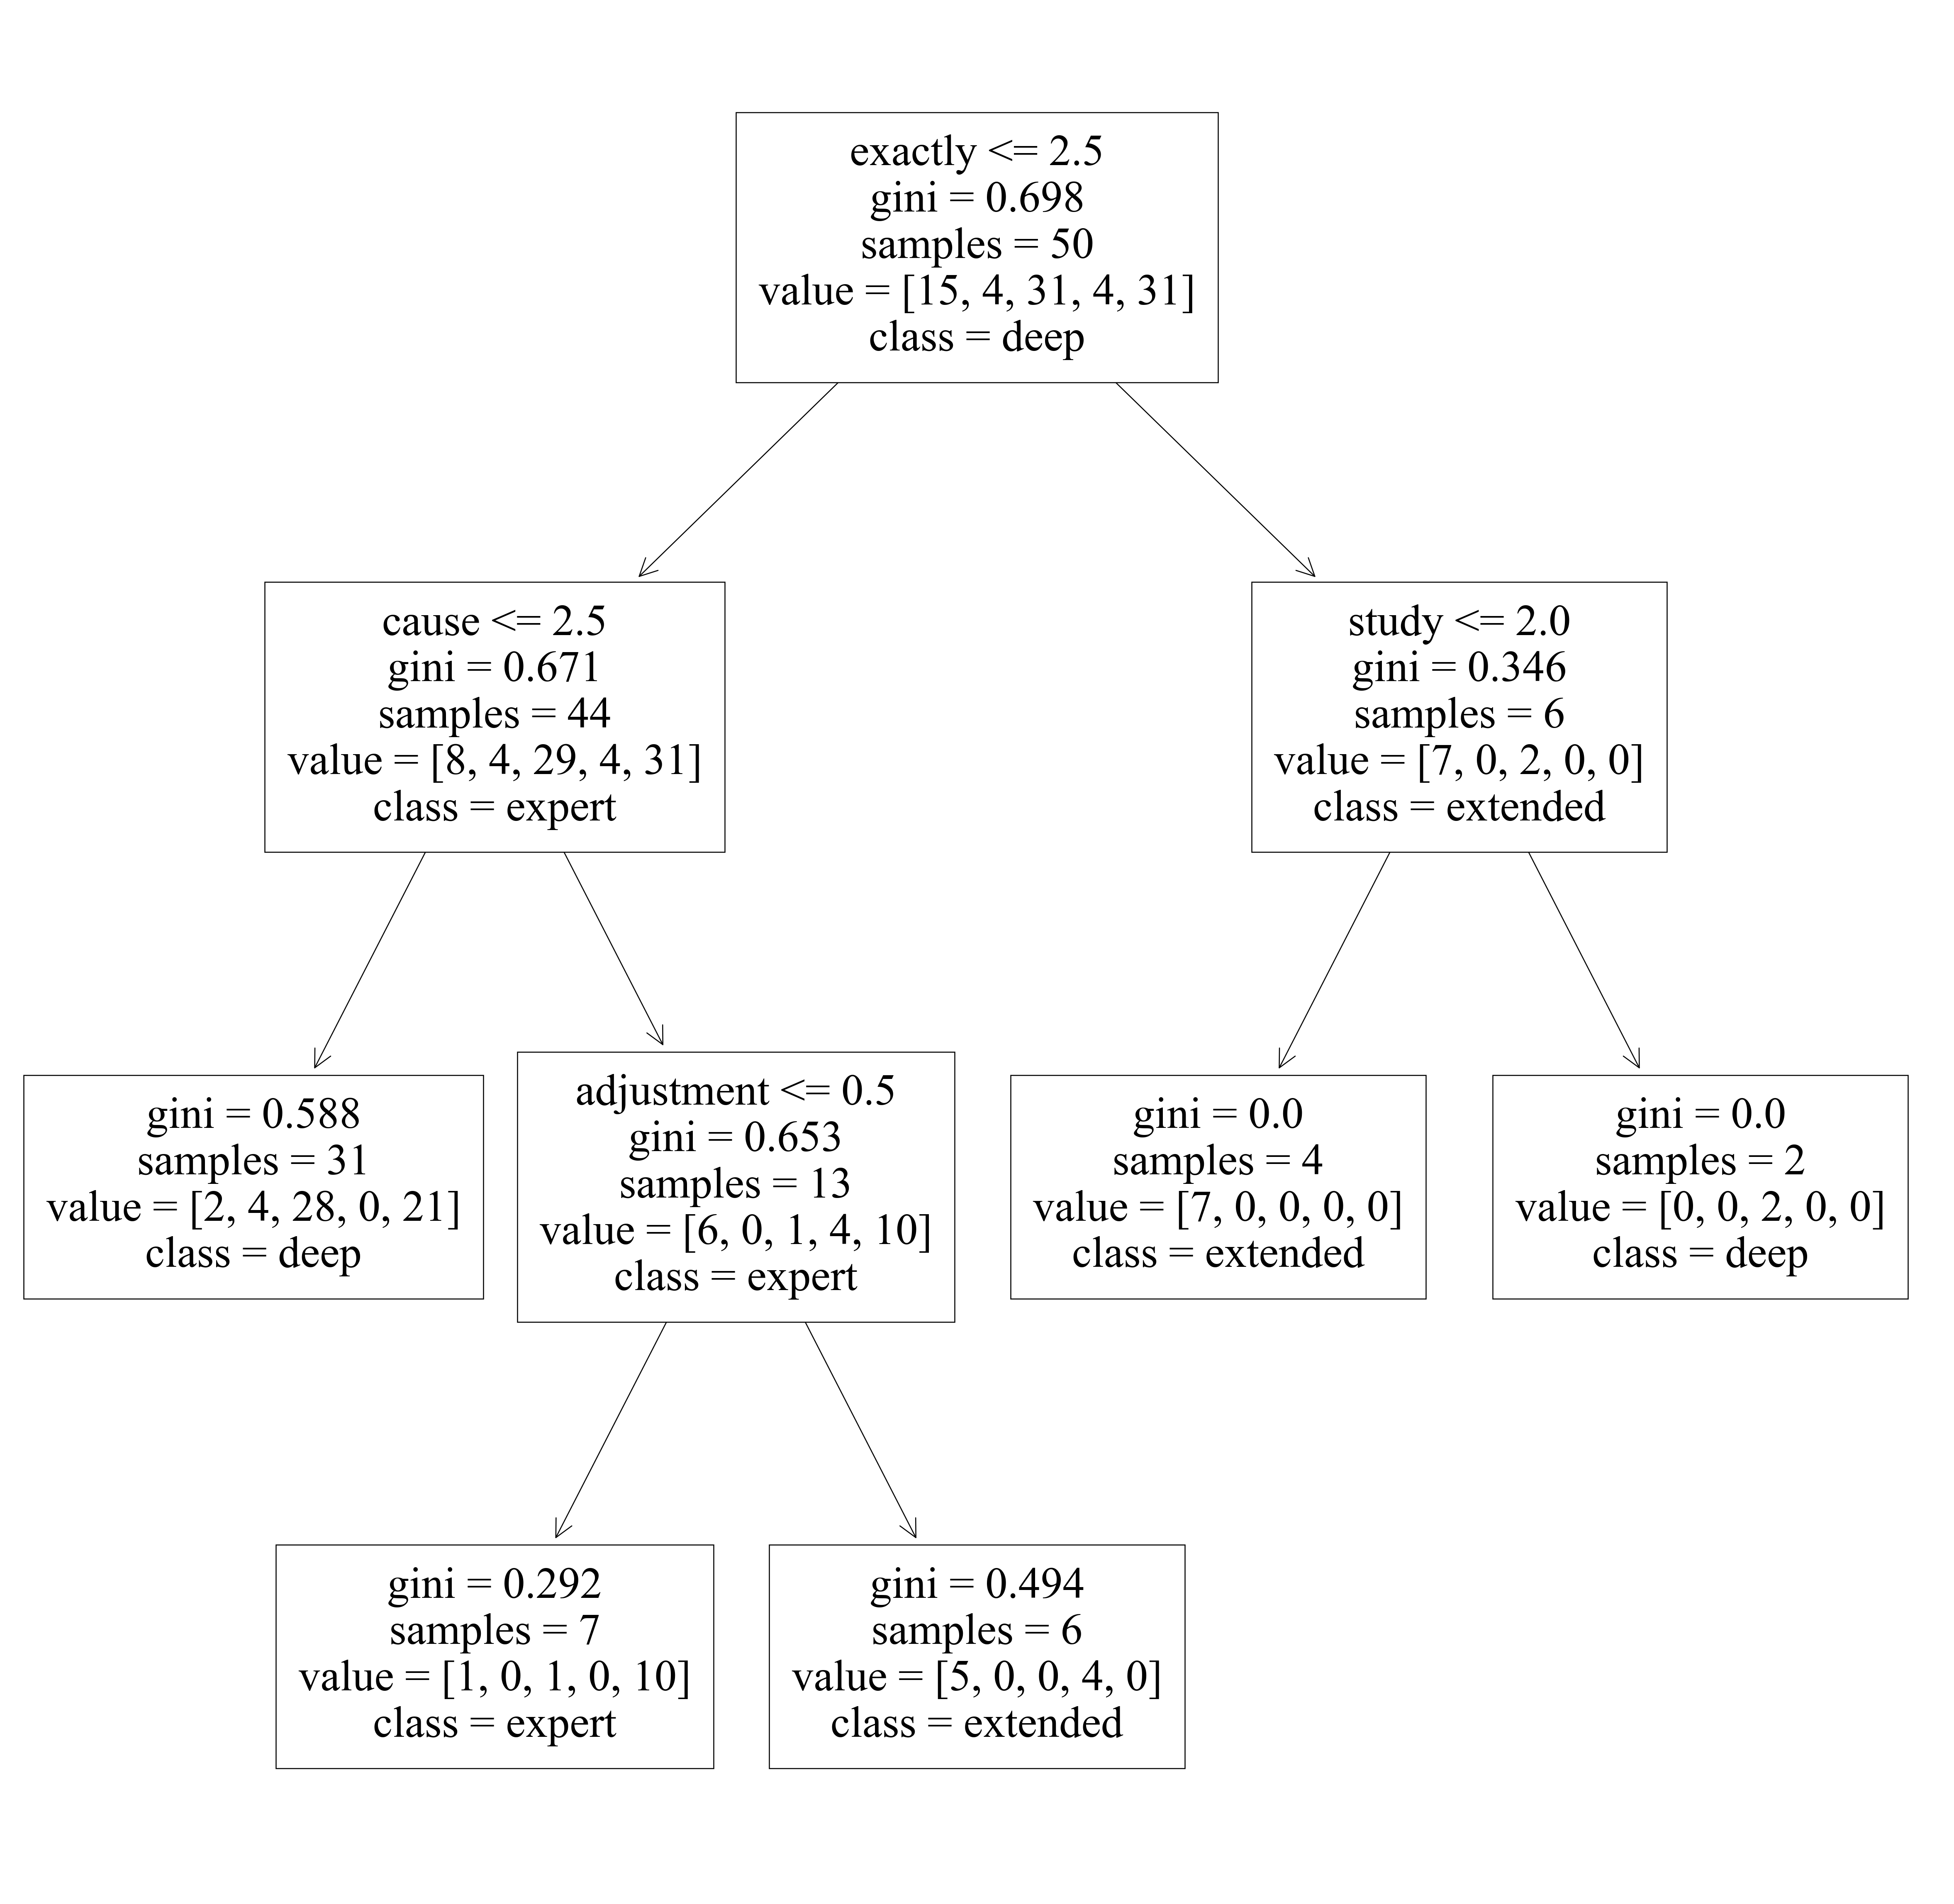

MemoryError: In RendererAgg: Out of memory

<Figure size 24000x24000 with 1 Axes>

In [9]:

# little tree extraction example
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
wordvec_names, wordvec_counts = ml_tools.BoW(df['Content'].tolist())
wordvec_names2, wordvec_counts2 = ml_tools.tf_idf(df['Content'].tolist())
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split( wordvec_counts, df['ArgumentLevel'].tolist() , train_size = 0.5)
X_train_b2, X_test_b2, y_train_b2, y_test_b2 = train_test_split( wordvec_counts, df['ReasoningLevel'].tolist() , train_size = 0.8)


no_of_nodes_al = 5
no_of_nodes_ep = 2
# RF -- Argument level - bow

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split( wordvec_counts, df['ArgumentLevel'].tolist() , train_size = i)
rf_model = RandomForestClassifier(max_leaf_nodes=no_of_nodes_al)
rf_model.fit(X_train_b, y_train_b)
plt.figure(figsize=(10,10))
class_names = df['ArgumentLevel']
_ = tree.plot_tree(rf_model.estimators_[0],class_names=class_names, feature_names=wordvec_names)
plt.savefig('outputs/{}-{}-{}-{}-{}trainratio.png'.format('RF','AL','BOW','DT', i))

#%%
# RF -- Epistomology - bow

X_train_b2, X_test_b2, y_train_b2, y_test_b2 = train_test_split( wordvec_counts, df['ReasoningLevel'].tolist() , train_size = i)
rf_model = RandomForestClassifier(max_leaf_nodes=no_of_nodes_ep)
rf_model.fit(X_train_b2, y_train_b2)
plt.figure(figsize=(40,40))
class_names2 = df['ReasoningLevel']
_ = tree.plot_tree(rf_model.estimators_[0],class_names=class_names2, feature_names= wordvec_names)
plt.savefig('outputs/{}-{}-{}-{}-{}trainratio.png'.format('RF','RL','BOW','DT', i))


# RF -- Argument level - tfidf

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split( wordvec_counts2, df['ArgumentLevel'].tolist() , train_size = i)
rf_model = RandomForestClassifier(max_leaf_nodes= no_of_nodes_al)
rf_model.fit(X_train_b, y_train_b)
plt.figure(figsize=(40,40))
class_names = df['ArgumentLevel']
_ = tree.plot_tree(rf_model.estimators_[0],class_names=class_names, feature_names=wordvec_names2)
plt.savefig('outputs/{}-{}-{}-{}-{}trainratio.png'.format('RF','AL','TF-IDF','DT',i))

# RF -- Epistomology - tfidf
X_train_b2, X_test_b2, y_train_b2, y_test_b2 = train_test_split( wordvec_counts, df['ReasoningLevel'].tolist() , train_size = i)
rf_model = RandomForestClassifier(max_leaf_nodes= no_of_nodes_ep)
rf_model.fit(X_train_b2, y_train_b2)
plt.figure(figsize=(40,40))
class_names2 = df['ReasoningLevel']
_ = tree.plot_tree(rf_model.estimators_[0],class_names=class_names2, feature_names= wordvec_names)
plt.savefig('outputs/{}-{}-{}-{}-{}trainratio.png'.format('RF','RL','TFIDF','DT', i))


In [ ]:
#------ trainsize RF-----------
# loop over labels for training size, feature extractions: Naive bayes
accuracies_rf = []
accuracies_sd_rf = []
feature2_rf = []
labels2_rf  = []
for label in labels:
    for feature in features:
        # -- Feature extraction: TF-IDF ---
        if feature ==  'ifidf':
            wordvec_names, wordvec_counts = ml_tools.tf_idf(df['Content'].tolist())
            print('tfidf')
            t = ml_tools.lr_accuracy_trainsize_plot_general(ml_tools.random_forest, wordvec_counts, df[label].tolist(),label, feature, num_epochs, train_sizes)
            accuracies_rf.append(t[0])
            accuracies_sd_rf.append(t[1])
            feature2_rf.append(feature)
            labels2_rf.append(label)
        # -- Feature extraction: Bag of Words ---
        elif feature == 'bow':
            wordvec_names, wordvec_counts = ml_tools.BoW(df['Content'].tolist())
            print('bow')
            b = ml_tools.lr_accuracy_trainsize_plot_general(ml_tools.random_forest, wordvec_counts, df[label].tolist(),label, feature, num_epochs, train_sizes)
            accuracies_rf.append(b[0])
            accuracies_sd_rf.append(b[1])
            feature2_rf.append(feature)
            labels2_rf.append(label)

df1_rf = pd.DataFrame({'feature extraction':feature2_rf,'accuracy':accuracies_rf, 'sem': accuracies_sd_rf, 'Label': labels2_rf})
#----- pickled dataframe
utils.save_as_pickle_file(df1_rf,'RF_trainingsize_plot_2500epochs_y1c1c2_sem')

#%%
unpickle_df1 = utils.load_pickle_file_to_df('RF_trainingsize_plot_2500epochs_y1c1c2_sem')

#%%
for i in range(len(unpickle_df1)):
    filepath = 'outputs/{}-RF2-{}epochs-{}-graph.png'.format(unpickle_df1['feature extraction'][i], num_epochs, unpickle_df1['Label'][i]) # ** always change name **
    formats.scatter_plot(xvalue = train_sizes, yvalue = unpickle_df1['accuracy'][i], yerr = unpickle_df1['sem'][i], xlabel = 'Training Size', ylabel = 'Accuracy', filepath = filepath)


                                    LINEAR REGRESSION CLASSIFIER

#------ trainsize LR -----------
epoch_lr_no = 10
accuracies_lr = []
accuracies_sd_lr = []
feature2_lr = []
labels2_lr = []
for label in labels:
    for feature in features:
        # -- Feature extraction: TF-IDF ---
        if feature ==  'ifidf':
            wordvec_names, wordvec_counts = ml_tools.tf_idf(df['Content'].tolist())
            print('tfidf')
            t = ml_tools.lr_accuracy_trainsize_plot_general(ml_tools.logistic_regression2, wordvec_counts, df[label].tolist(),label, feature, epoch_lr_no, train_sizes)
            accuracies_lr.append(t[0])
            accuracies_sd_lr.append(t[1])
            feature2_lr.append(feature)
            labels2_lr.append(label)
        # -- Feature extraction: Bag of Words ---
        elif feature == 'bow':
            wordvec_names, wordvec_counts = ml_tools.BoW(df['Content'].tolist())
            print('bow')
            b = ml_tools.lr_accuracy_trainsize_plot_general(ml_tools.logistic_regression2, wordvec_counts, df[label].tolist(),label, feature, epoch_lr_no, train_sizes)
            accuracies_lr.append(b[0])
            accuracies_sd_lr.append(b[1])
            feature2_lr.append(feature)
            labels2_lr.append(label)

df1_lr= pd.DataFrame({'feature extraction':feature2_lr,'accuracy':accuracies_lr, 'sem': accuracies_sd_lr, 'Label': labels2_lr})
#%%
#----- pickled dataframe --------
utils.save_as_pickle_file(df1_lr,'LR_trainingsize_plot_500epochs_y1c1c2_sem')

#%%
unpickle_df_lr = utils.load_pickle_file_to_df('LR_trainingsize_plot_500epochs_y1c1c2_sem')

#%%
for i in range(len(unpickle_df_lr)):
    filepath = 'outputs/{}-LR2-{}epochs-{}-graph.png'.format(unpickle_df_lr['feature extraction'][i], num_epochs, unpickle_df_lr['Label'][i]) # ** always change name **
    formats.scatter_plot(xvalue = train_sizes, yvalue = unpickle_df_lr['accuracy'][i], yerr = unpickle_df_lr['sem'][i], xlabel = 'Training Size', ylabel = 'Accuracy', filepath = filepath)



                                        SUPPORT VECTOR MACHINE

In [ ]:
accuracies_svm = []
accuracies_sd_svm = []
feature2_svm = []
labels2_svm = []
for label in labels:
    for feature in features:
        # -- Feature extraction: TF-IDF ---
        if feature ==  'ifidf':
            wordvec_names, wordvec_counts = ml_tools.tf_idf(df['Content'].tolist())
            print('tfidf')
            t = ml_tools.lr_accuracy_trainsize_plot_general(ml_tools.support_vec_machine, wordvec_counts, df[label].tolist(),label, feature, num_epochs, train_sizes)
            accuracies_svm.append(t[0])
            accuracies_sd_svm.append(t[1])
            feature2_svm.append(feature)
            labels2_svm.append(label)
        # -- Feature extraction: Bag of Words ---
        elif feature == 'bow':
            wordvec_names, wordvec_counts = ml_tools.BoW(df['Content'].tolist())
            print('bow')
            b = ml_tools.lr_accuracy_trainsize_plot_general(ml_tools.support_vec_machine, wordvec_counts, df[label].tolist(),label, feature, num_epochs, train_sizes)
            accuracies_svm.append(b[0])
            accuracies_sd_svm.append(b[1])
            feature2_svm.append(feature)
            labels2_svm.append(label)

df1_svm= pd.DataFrame({'feature extraction':feature2_svm,'accuracy':accuracies_svm, 'sem': accuracies_sd_svm, 'Label': labels2_svm})

#%%
#----- pickled dataframe --------
utils.save_as_pickle_file(df1_svm,'SVM_trainingsize_plot_2500epochs_y1c1c2_sem')

#%%
unpickle_df_svm = utils.load_pickle_file_to_df('SVM_trainingsize_plot_2500epochs_y1c1c2_sem')

#%%
for i in range(len(unpickle_df_svm)):
    filepath = 'outputs/{}-SVM2-{}epochs-{}-graph.png'.format(unpickle_df_svm['feature extraction'][i], num_epochs, unpickle_df_svm['Label'][i]) # ** always change name **
    formats.scatter_plot(xvalue = train_sizes, yvalue = unpickle_df_svm['accuracy'][i], yerr = unpickle_df_svm['sem'][i], xlabel = 'Training Size', ylabel = 'Accuracy', filepath = filepath)

# %%
print(unpickle_df_svm['accuracy'].iloc[0])
